In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# peso diferencial
# valor entre 0 e 2
F = 0.8 

# valor entre 0 e 1
CR = 0.3

tamanho_vetor = 5

#### Criando a função que gera o prato de comida

- primeiro elemento - peito de frango
- segundo elemento  - batata 
- terceiro elemento - arroz integral
- quarto elemento   - ovo 
- quinte elemento   - feijão

In [4]:
def gera_prato(tamanho_vetor):
    return list(np.random.uniform(0, 199, tamanho_vetor))

In [5]:
gera_prato(5)

[24.249494208234008,
 142.85669661706856,
 176.81576112186062,
 76.99424702221631,
 42.686721196179214]

#### Criando a população

População de soluções

In [6]:
def gera_populacao(tamanho_populacao):
    return [gera_prato(tamanho_vetor) for _ in range(tamanho_populacao)]

In [7]:
gera_populacao(5)

[[186.97409979879598,
  153.01350397200127,
  23.29318682961616,
  57.53890820060087,
  97.62881154837488],
 [77.68899490597188,
  116.47684232735804,
  116.5290236699403,
  163.47376166128734,
  182.98301607357715],
 [37.21008138064919,
  104.7233147448752,
  133.61795817286713,
  39.98194123801859,
  20.296807542223203],
 [170.16362365675826,
  43.74017392762126,
  8.40276622656739,
  79.88227543588027,
  175.48944556356355],
 [123.86964821604666,
  137.58595789651332,
  156.33435554179917,
  169.3872770275652,
  16.635410258960587]]

#### Função objetiva

In [8]:
def divergencia(prato, mostrar=False):
    # indice 1  - peito de frango
    # indice 2  - batata 
    # indice 3  - arroz integral
    # indice 4  - ovo 
    # indice 5  - feijão

    carboidrato = prato[0]*0.05 + prato[1]*0.24 + prato[2]*0.26 + prato[3]*0.015 + prato[4]*0.29
    proteina = prato[0]*0.23 + prato[1]*0.02 + prato[2]*0.026 + prato[3]*0.13 + prato[4]*0.095 
    lipideo = prato[0]*0.05 + prato[1]*0.00 + prato[2]*0.01 + prato[3]*0.089 + prato[4]*0.014
    
    total = carboidrato + proteina + lipideo
    soma_gr_prato = sum(prato)
    
    porc_carb = (carboidrato/total)*100
    porc_prot = (proteina/total)*100
    porc_lipi = (lipideo/total)*100
    
    diff_carb = abs(porc_carb-55)
    diff_prot = abs(porc_prot-30)
    diff_lipi = abs(porc_lipi-15)
    
    if mostrar:
        print(f'Carboidratos: {porc_carb}')
        print(f'Proteinas: {porc_prot}')
        print(f'Lipideos: {porc_lipi}')
        print(f'Total gramas: {soma_gr_prato}')
    
    diff_total = diff_carb + diff_prot + diff_lipi
    
    return diff_total

In [9]:
for i in range(5):
    x = gera_prato(5)
    print(x)
    print(divergencia(x,True), '\n')

[152.06111361690824, 62.72376062458714, 102.37958150148842, 80.41639584028437, 7.1764662626671925]
Carboidratos: 44.366756497046666
Proteinas: 42.22570948770088
Lipideos: 13.407534015252448
Total gramas: 404.7573178459354
24.45141897540177 

[134.55574308236692, 63.63110234777291, 73.60060219152412, 22.517234083333214, 58.86550538256929]
Carboidratos: 52.510860088444524
Proteinas: 38.257838192270405
Lipideos: 9.23130171928508
Total gramas: 353.17018708756643
16.515676384540804 

[3.8036426369880556, 168.19014542352429, 183.831524391732, 18.0019732300369, 17.462021969405985]
Carboidratos: 84.72348775161598
Proteinas: 11.772089136093278
Lipideos: 3.5044231122907483
Total gramas: 391.2893076516873
59.446975503231954 

[3.8988560450614997, 188.48688068835034, 38.07976357690232, 101.3355253372608, 83.23418978345445]
Carboidratos: 68.35344813587918
Proteinas: 22.565546886165844
Lipideos: 9.081004977954985
Total gramas: 415.0352154310294
26.706896271758346 

[191.1424353757685, 44.98630135796

#### Seleciona 3 vetores diferentes

In [10]:
def seleciona3(parental, populacao):

    # criando uma nova lista
    p2 = populacao.copy()
    # excluindo o pai pelo index
    p2.pop(parental)
    # retornando 3 valores da lista
    return random.sample(p2, 3)

In [11]:
pop = [[1,2,3], [3,4,4], [3,5,6], [6,5,4], [3,8,7]]
print(pop)
print(pop[0])
print(seleciona3(0, pop))

[[1, 2, 3], [3, 4, 4], [3, 5, 6], [6, 5, 4], [3, 8, 7]]
[1, 2, 3]
[[3, 5, 6], [3, 8, 7], [3, 4, 4]]


### Mutação

In [12]:
def mutacao(vetorParental, tres):
    A = tres[0]
    B = tres[1]
    C = tres[2]
    
    tentativa = []

    for i, value in enumerate(vetorParental):
        r = random.random()
        if r < CR:
            tentativa.append(A[i] + F * abs(B[i] - C[i]))
        else:
            tentativa.append(value)
    
    return tentativa

In [13]:
mutacao(pop[0], seleciona3(0, pop))

[1, 8.0, 3]

Melhor vetor

In [14]:
def melhor_vetor(pop):
    notas = [divergencia(i) for i in pop]
    indice = notas.index(min(notas))

    return pop[indice]


In [15]:
pop1 = gera_populacao(10)
melhor = melhor_vetor(pop1)
print(melhor)
print(divergencia(melhor))

[9.145853134671414, 16.125373171842803, 45.390334006214346, 82.14916768278071, 61.950187022063844]
2.460771026133056


### Algoritmo

In [16]:
populacao = gera_populacao(5)
melhores = []
for e in range(200):
    for index, p in enumerate(populacao):
        tres = seleciona3(index, populacao)
        tentativa = mutacao(p, tres)
        if divergencia(tentativa) < divergencia(p):
            populacao.pop(index)
            populacao.append(tentativa)
    print(melhor_vetor(populacao))
    melhor = divergencia(melhor_vetor(populacao))
    melhores.append(melhor)
    print(melhor, '\n')

[70.88775829508982, 183.69344543390602, 3.6565747180172266, 68.80601667412878, 23.339160944028972]
9.453993099116364 

[70.88775829508982, 183.69344543390602, 3.6565747180172266, 68.80601667412878, 23.339160944028972]
9.453993099116364 

[215.78221449857355, 207.9053682821383, 192.737638092834, 179.98066374028943, 136.82776943504393]
8.234595150625546 

[215.78221449857355, 207.9053682821383, 192.737638092834, 179.98066374028943, 136.82776943504393]
8.234595150625546 

[215.78221449857355, 207.9053682821383, 192.737638092834, 179.98066374028943, 136.82776943504393]
8.234595150625546 

[101.5281688739286, 202.68576276320775, 62.89288203511439, 163.3565844060514, 102.7822158524705]
6.438465445388031 

[101.5281688739286, 202.68576276320775, 62.89288203511439, 163.3565844060514, 102.7822158524705]
6.438465445388031 

[101.5281688739286, 202.68576276320775, 62.89288203511439, 163.3565844060514, 102.7822158524705]
6.438465445388031 

[101.5281688739286, 202.68576276320775, 62.89288203511439

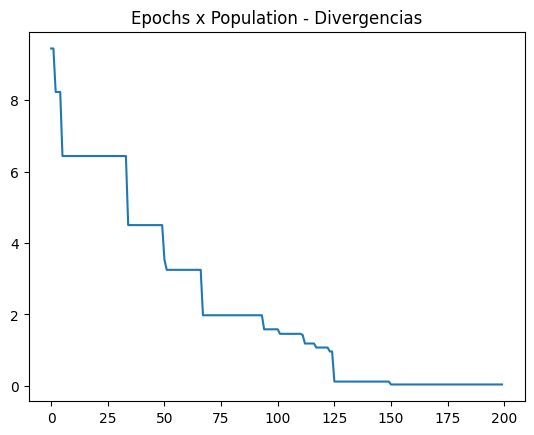

In [17]:
plt.title('Epochs x Population - Divergencias')
plt.plot(melhores);